In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols
import seaborn as sns

In [27]:
df=pd.read_excel('weber contrasts - 1.xlsx')
df.head(82)

,Image,WeberContrast 1,WeberContrast 2,WeberContrast 3,Mean,std,RMSContrast 1,RMSContrast 2,RMSContrast 3,MeanRMS,std.1
0,00.jpg,2.805970,2.863636,2.923077,2.864228,0.047810,45.921539,45.174758,44.521187,45.205828,0.572113
1,01.jpg,0.593750,0.583851,0.593750,0.590450,0.004666,7.326067,8.865415,7.505150,7.898877,0.687345
2,1.jpg,0.645161,0.655844,0.677632,0.659546,0.013512,8.681536,9.403865,9.820988,9.302129,0.470709
3,2.jpg,2.642857,2.591549,2.642857,2.625755,0.024187,41.722242,43.697102,40.736190,42.051845,1.231051
4,3.jpg,2.695652,2.541667,2.541667,2.592995,0.072589,8.786902,8.952426,8.652933,8.797420,0.122494
...,...,...,...,...,...,...,...,...,...,...,...
76,77.jpg,2.750000,1.056452,2.805970,2.204141,0.811860,46.766841,24.760782,47.149074,39.558899,10.465012
77,78.jpg,1.361111,2.591549,2.311688,2.088116,0.526614,29.953634,43.647374,29.612966,34.404658,6.537067
78,79.jpg,2.311688,2.695652,2.400000,2.469113,0.164194,33.644984,43.120136,33.616767,36.793962,4.473295
79,80.jpg,2.541667,1.684211,2.642857,2.289578,0.430048,43.405884,34.116308,43.931972,40.484721,4.508267


In [17]:
# Define the OLS formula for Mean and Mean RMS
ols_formula = 'Mean ~ MeanRMS'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     323.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.16e-29
Time:                        18:21:45   Log-Likelihood:                -48.814
No. Observations:                  81   AIC:                             101.6
Df Residuals:                      79   BIC:                             106.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1197      0.109      1.095      0.277      -0.098       0.337
MeanRMS        0.0664      0.004     17.987      0.000       0.059       0.074
==============================================================================
Omnibus:                       28.610   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.402
Skew:                           1.325   Prob(JB):                     2.53e-12
Kurtosis:                       5.967   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

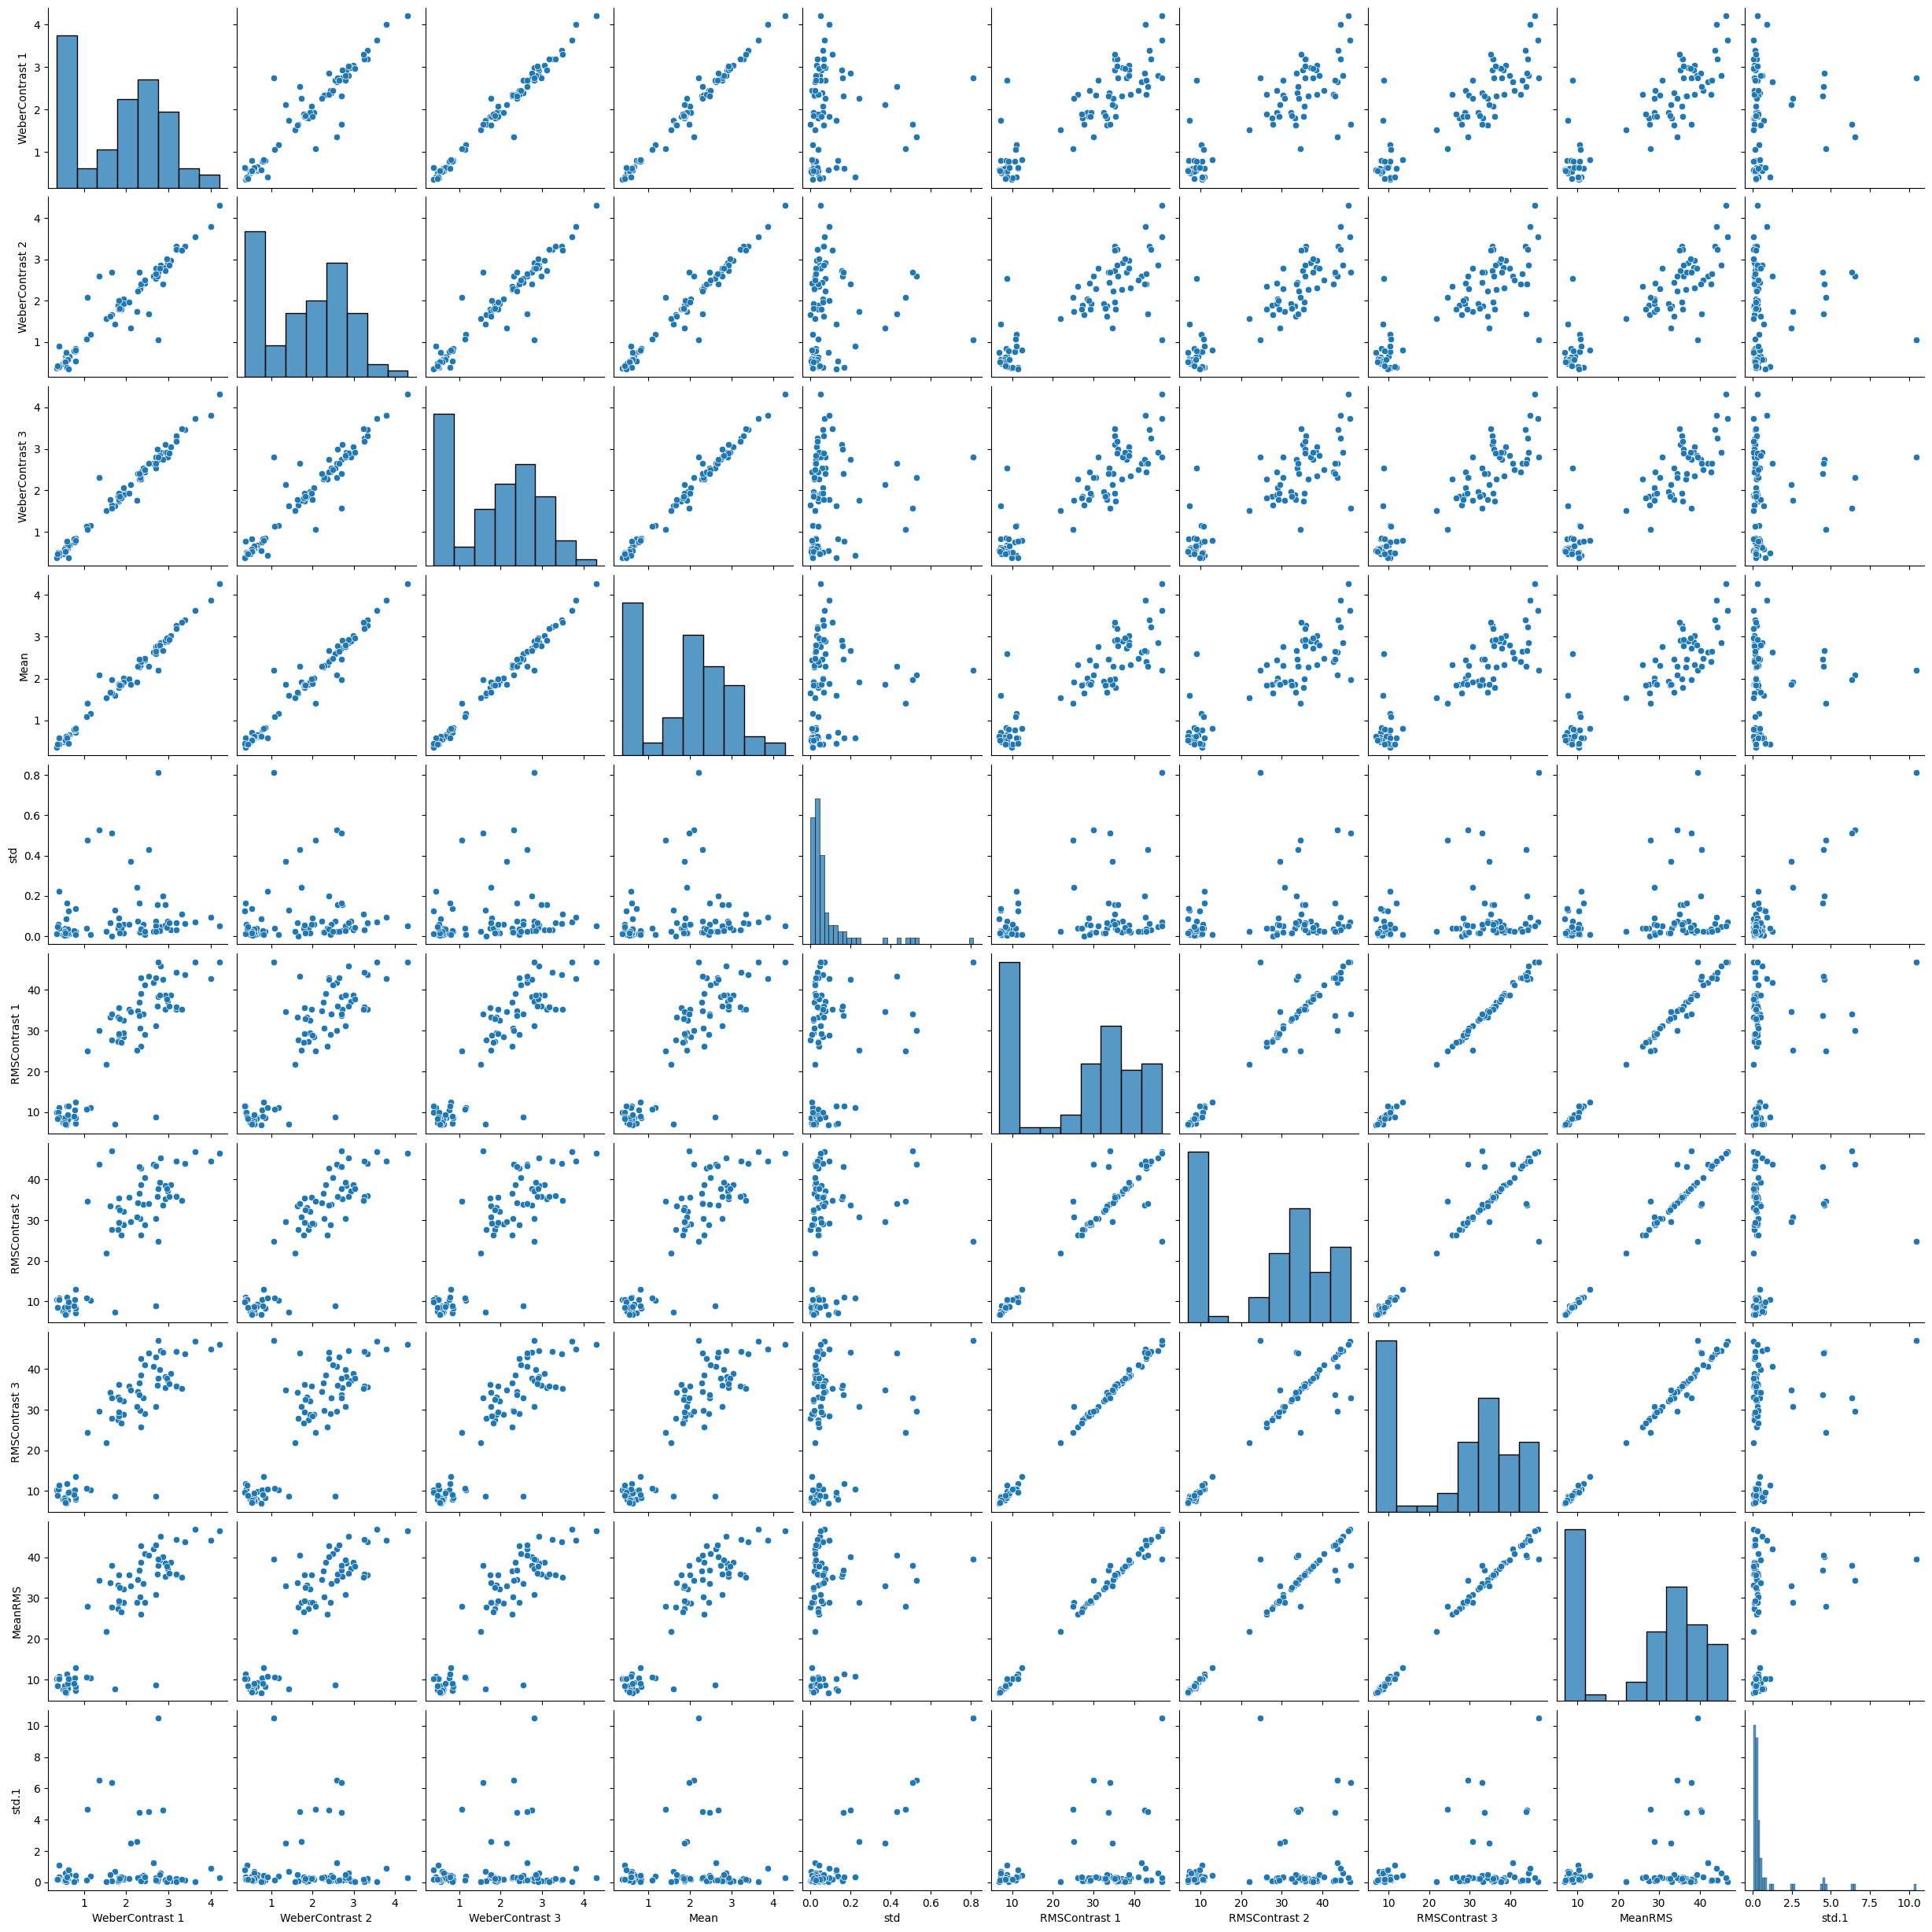

In [24]:
sns.pairplot(df)

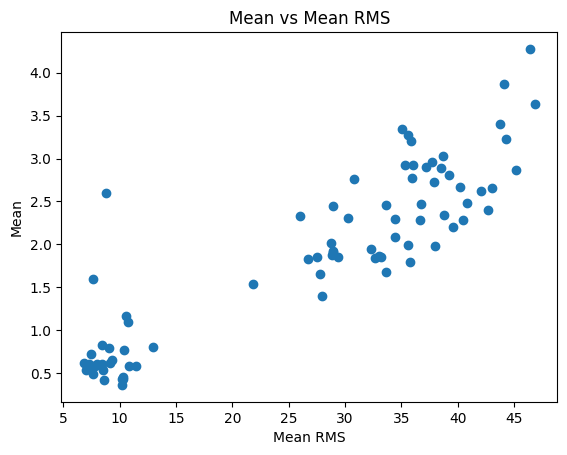

In [25]:

plt.scatter(df['MeanRMS'], df['Mean'])


plt.xlabel('Mean RMS')
plt.ylabel('Mean')
plt.title('Mean vs Mean RMS')

plt.show()

In [22]:

rsm_normalized_stddev = df['std.1'] / np.mean(df['MeanRMS'])
weber_normalized_stddev = df['std'] / np.mean(df['Mean'])

print(f"RSM Normalized Standard Deviation: {np.mean(rsm_normalized_stddev)}")
print(f"Weber Contrast Normalized Standard Deviation: {np.mean(weber_normalized_stddev)}")

RSM Normalized Standard Deviation: 0.031195555043853334
Weber Contrast Normalized Standard Deviation: 0.048088039070677484
